## Project Scope and Objective

The problem involves classifying emails as spam or non-spam based on various features. The dataset, called 'spambase.data,' contains 48 continuous real attributes representing the percentage of words in the email that match specific keywords, 6 continuous real attributes indicating the percentage of characters that match certain characters, and 3 attributes related to the length of sequences of consecutive capital letters. The last column of the dataset is a binary class attribute denoting whether the email is considered spam (1) or not (0).

The data was collected from both spam reports and non-spam emails, with non-spam emails sourced from work and personal correspondence. Non-spam indicators are few and may be specific to individuals, making the construction of a generalized spam filter challenging. The goal is to develop a model that can accurately classify emails as spam or non-spam based on these features, facilitating the identification and filtering of unsolicited commercial emails.

This dataset has been sourced from UC Irvine Machine Learning Repositor (http://archive.ics.uci.edu/dataset/94/spambase).

In this case of mail spam detection using the given dataset, the task typically involves detecting point anomalies detection.

## Data Handling

In [ ]:
!pip install ydata-profiling

In [1]:
# list of column names ofr the dataset
list_cols = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d',\
             'word_freq_our','word_freq_over','word_freq_remove','word_freq_internet',\
             'word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',\
             'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',\
             'word_freq_business','word_freq_email','word_freq_you','word_freq_credit',\
             'word_freq_your','word_freq_font','word_freq_000','word_freq_money',\
             'word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650',\
             'word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',\
             'word_freq_data','word_freq_415','word_freq_85','word_freq_technology',\
             'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct',\
             'word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',\
             'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',\
             'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$',\
             'char_freq_#','capital_run_length_average','capital_run_length_longest',\
             'capital_run_length_total','class']

In [2]:
import pandas as pd

# reading the dataset
df = pd.read_csv('/content/spambase.data',header=None)

# adding the column headers through a list as the original dataset doesn't contain headers
df.columns = list_cols
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
from ydata_profiling import ProfileReport
# genereating a profile report for data exploration
profile_train = ProfileReport(df, title="Profiling Report",minimal=True)

# writing the report as html file for easy access
profile_train.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

From the data profiling above, we learnt the following:
1. Most of the word and character frequency features are left skewed as majority of these frequencies in the dataset are 0 or close to it. This somehow makes sense as not all mails are expected to have all the words available as out features for this dataset.
2. Class variable (the target) contains 60.6% of mails as non-spam and rest 39.4% as spam emails.
3. Target variable is defined as balanced when the classes are 50/50 or max as 60/40. Since the target variable in this dataset tends to be little imbalanced (60.6/39.4), we would be careful in choosing evaluation metrics. Along with the classification accuracy and confusion matrx, we would also evaluate based on precision, recall, f1-score and ROC curve.
4. All the features are numeric and continuous variables and the target is a classification, so descrete variable.

## Model Selection and Development

Splitting the dataset into features and target and further splitting the dataset rows into train, validation and test dataset

In [3]:
# Separate features (X) and labels (y)
X = df.drop('class', axis=1)
y = df['class']

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [5]:
len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val)

(3220, 691, 690, 3220, 691, 690)

First let's check how isolation forest model works on predicting the spams in our dataset. We have maitained contamination as 0.4 because we know that 39.4% (~40%) of the data in our overall dataset is spam. Hence, assuming the same for the train, validation and test data.

In [6]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.4, random_state=42)
# Fit the model on the training set
model.fit(X_train.values,y_train.values)

IsolationForest(contamination=0.4, random_state=42)

In [7]:
# Validate the model on the testing set
y_val_pred = model.predict(X_val.values)
# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_val_pred_binary = [0 if label == 1 else 1 for label in y_val_pred]

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model on the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_binary))

print("Validation Accuracy Score:", round(accuracy_score(y_val, y_val_pred_binary),2))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_binary))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       399
           1       0.50      0.48      0.49       291

    accuracy                           0.58       690
   macro avg       0.56      0.56      0.56       690
weighted avg       0.57      0.58      0.58       690

Validation Accuracy Score: 0.58
Validation Confusion Matrix:
[[258 141]
 [151 140]]


- The model has a slightly better performance on class 0 compared to class 1, as evident from higher precision, recall, and F1-score for class 0.
- The overall accuracy is influenced by the class imbalance, with class 0 being the majority class.
- The F1-scores provide a balance between precision and recall, and they are relatively close for both classes.
- The confusion matrix indicates a significant number of false positives for class 1, which means instances of class 0 are often misclassified as class 1.

Next, let's check another model One Class SVM and see how model works on predicting the spams in our dataset.

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier

model = OneClassSVM(nu=0.4)
model.fit(X_train,y_train)

OneClassSVM(nu=0.4)

In [9]:
# Validate the model on the testing set
y_val_pred = model.predict(X_val)
# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_val_pred_binary = [0 if label == 1 else 1 for label in y_val_pred]

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model on the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_binary))

print("Validation Accuracy Score:", round(accuracy_score(y_val, y_val_pred_binary),2))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_binary))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.59       399
           1       0.40      0.35      0.37       291

    accuracy                           0.50       690
   macro avg       0.48      0.48      0.48       690
weighted avg       0.49      0.50      0.50       690

Validation Accuracy Score: 0.5
Validation Confusion Matrix:
[[245 154]
 [189 102]]


- The One-Class SVM model has a modest performance, with an accuracy of 50%.
Class 0 (majority class) has a relatively better performance compared to class 1, as indicated by higher precision, recall, and F1-score.
- The F1-scores are close for both classes, suggesting a balance between precision and recall.
- The confusion matrix indicates a significant number of false positives for class 1, meaning instances of class 0 are often misclassified as class 1.

*The accuracy scores suggest that the model's performance is comparable to random guessing, emphasizing the need for improvement.*

*The confusion matrix highlights challenges in correctly identifying both spam and non-spam instances, with a significant number of false positives and false negatives.*

Looking at both models which should be working really well for anomaly detection is giving only 40-50% accuracy in predicting spams. Next we also tried Random Forest Classifier, since this model has been tried and tested for many other scenarios earlier.

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
# Validate the model on the testing set
y_val_pred = model.predict(X_val)
# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_val_pred_binary = [1 if label == 1 else 0 for label in y_val_pred]

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model on the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_binary))

print("Validation Accuracy Score:", round(accuracy_score(y_val, y_val_pred_binary),2))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_binary))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       399
           1       0.95      0.94      0.95       291

    accuracy                           0.96       690
   macro avg       0.95      0.95      0.95       690
weighted avg       0.96      0.96      0.96       690

Validation Accuracy Score: 0.96
Validation Confusion Matrix:
[[386  13]
 [ 18 273]]



- The Random Forest model demonstrates excellent performance with an accuracy of 96%.
- Both classes (0 and 1) have high precision, recall, and F1-scores, indicating a balanced and accurate classification.
- The confusion matrix shows a small number of false positives and false negatives, highlighting the model's robustness.


*The high precision, recall, and F1-scores for both classes, coupled with the accuracy of 0.96, indicate that the random forest model performs exceptionally well in distinguishing between spam and non-spam emails.*

*The confusion matrix further reinforces the model's effectiveness, with a low number of false positives and false negatives.*

Now, this gives a lot more clarity. Both the models Isolation Forest and One-Class SVM assume that **anomalies are rare, and the majority of instances in the training data are normal**. And if the dataset has a significant class imbalance, where anomalies are not rare, meaning anomalies make up a significant portion of your data, it impacts the model's performance drastically.

This clearly explains why both of our models failed to achieve good accuracy in the spam detection. To experiment on this, we will transform our dataset in order to fullfil the model's assumptions.

Below, we are removing the rows which are spam and retaining only 8% of spam rows in the dataset to make the spams rare. Finally our dataset would have ~5% spam data and ~95% normal data.

In [13]:
# Identify rows with the specified class
class_rows = df[df['class'] == 1]

# Keep only 8% of the rows for the spam class
sample_spam = class_rows.sample(frac=0.08, random_state=42)

# Filter out the rows with the specified class
full_non_spam = df[df['class'] != 1]

# Concatenate the remaining rows with the filtered data
final_df = pd.concat([full_non_spam, sample_spam])

print('Transfromed dataframe shape:\n', final_df.shape)
print('\nOriginal dataframe class distribution:\n', df['class'].value_counts(normalize=True) * 100)
print('\nTransfromed dataframe class distribution:\n', final_df['class'].value_counts(normalize=True) * 100)

Transfromed dataframe shape:
 (2933, 58)

Original dataframe class distribution:
 0    60.595523
1    39.404477
Name: class, dtype: float64

Transfromed dataframe class distribution:
 0    95.056256
1     4.943744
Name: class, dtype: float64


Redeveloping the train-validation-test split on the newly filtered dataset.

In [14]:
# Separate features (X) and labels (y)
X = final_df.drop('class', axis=1)
y = final_df['class']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [16]:
len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val)

(2053, 440, 440, 2053, 440, 440)

Now, let's check how Isolation Forest performs on the new dataset.

In [17]:
from sklearn.ensemble import IsolationForest

model_islf = IsolationForest(contamination=0.05, random_state=42)
# Fit the model on the training set
model_islf.fit(X_train.values,y_train.values)

IsolationForest(contamination=0.05, random_state=42)

In [18]:
# Validate the model on the testing set
y_val_pred = model_islf.predict(X_val.values)
# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_val_pred_binary = [0 if label == 1 else 1 for label in y_val_pred]

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model on the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_binary))

print("Validation Accuracy Score:", round(accuracy_score(y_val, y_val_pred_binary),2))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_binary))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       414
           1       0.22      0.15      0.18        26

    accuracy                           0.92       440
   macro avg       0.59      0.56      0.57       440
weighted avg       0.90      0.92      0.91       440

Validation Accuracy Score: 0.92
Validation Confusion Matrix:
[[400  14]
 [ 22   4]]


- The Isolation Forest model demonstrates high accuracy (92%), but its performance is notably imbalanced between classes.
- Class 0 has strong precision, recall, and F1-score, indicating good detection of normal instances.
- Class 1, representing anomalies, has lower precision, recall, and F1-score, suggesting challenges in accurately identifying anomalies.



In [37]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier


model_svm = OneClassSVM(nu=0.05)
model_svm.fit(X_train,y_train)

OneClassSVM(nu=0.05)

In [26]:
# Validate the model on the testing set
y_val_pred = model_svm.predict(X_val)
# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_val_pred_binary = [0 if label == 1 else 1 for label in y_val_pred]

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model on the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_binary))

print("Validation Accuracy Score:", round(accuracy_score(y_val, y_val_pred_binary),2))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_binary))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       414
           1       0.25      0.15      0.19        26

    accuracy                           0.92       440
   macro avg       0.60      0.56      0.57       440
weighted avg       0.91      0.92      0.91       440

Validation Accuracy Score: 0.92
Validation Confusion Matrix:
[[402  12]
 [ 22   4]]


The One-Class SVM model exhibits high accuracy (92%), but its performance is imbalanced between classes.
Class 0 (normal instances) has strong precision, recall, and F1-score, indicating good detection.
Class 1 (anomalies) has lower precision, recall, and F1-score, suggesting challenges in accurately identifying anomalies.

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, classification_report, accuracy_score, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_samples': [0.25, 0.5, 0.75, 1.0],
    'contamination': [0.01, 0.02, 0.05, 0.1]
}

# Create the Isolation Forest model
model_islf = IsolationForest(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model_islf, param_grid, scoring='f1_weighted', refit='Accuracy', cv=5)

# Fit the model to the training data
grid_search.fit(X_train.values, y_train.values)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Validate the model on the testing set
y_val_pred = best_model.predict(X_val.values)
y_val_pred_binary = [0 if label == 1 else 1 for label in y_val_pred]

# Evaluate the model on the validation set
print("Best Parameters:", best_params)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_binary))

print("Validation Accuracy Score:", round(accuracy_score(y_val, y_val_pred_binary), 2))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_binary))

Best Parameters: {'contamination': 0.01, 'max_samples': 1.0, 'n_estimators': 50}

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       414
           1       0.29      0.08      0.12        26

    accuracy                           0.93       440
   macro avg       0.62      0.53      0.54       440
weighted avg       0.91      0.93      0.92       440

Validation Accuracy Score: 0.93
Validation Confusion Matrix:
[[409   5]
 [ 24   2]]


In [28]:
# Predict on the test set
y_test_pred = best_model.predict(X_test.values)
y_test_pred_binary = [0 if label == 1 else 1 for label in y_test_pred]

# Evaluate the model on the test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_binary))

print("Test Accuracy Score:", round(accuracy_score(y_test, y_test_pred_binary),2))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_binary))


Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       420
           1       0.17      0.05      0.08        20

    accuracy                           0.95       440
   macro avg       0.56      0.52      0.52       440
weighted avg       0.92      0.95      0.93       440

Test Accuracy Score: 0.95
Test Confusion Matrix:
[[415   5]
 [ 19   1]]


- Hyperparameter tuning has resulted in improved accuracy (93%) compared to the previous Isolation Forest model.
- The model has high precision, recall, and F1-score for class 0, indicating effective detection of normal instances.
- Class 1 (anomalies) has lower precision, recall, and F1-score, suggesting challenges in accurately identifying anomalies.

The accuracy has been much better now and even the precision in identifying the non-spam mails.

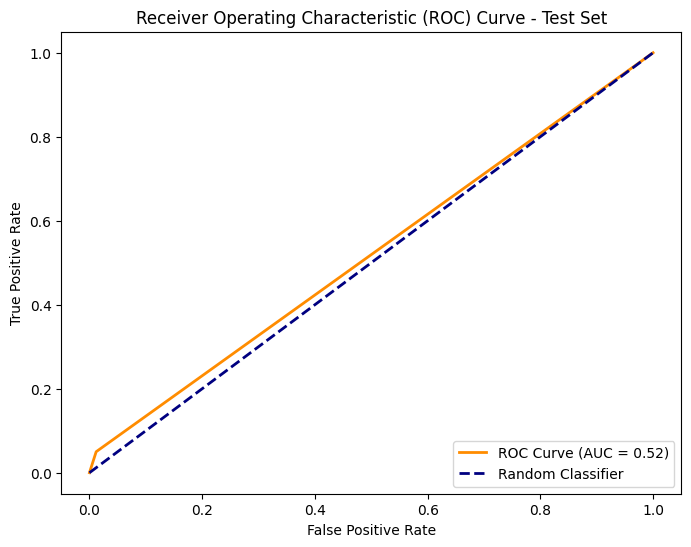

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

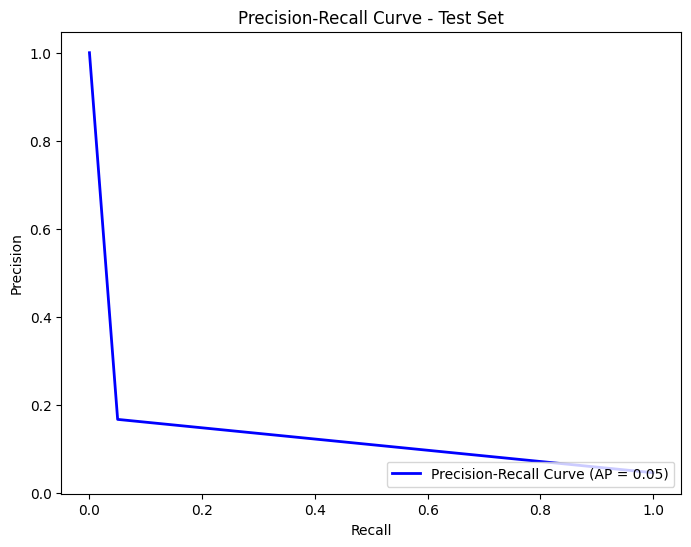

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_binary)
average_precision = average_precision_score(y_test, y_test_pred_binary)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

In [41]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'spam_detection_model.joblib')

['spam_detection_model.joblib']